In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt

In [ ]:
data_frame = pd.read_csv("/content/Admission_Predict.csv")

In [ ]:
data_frame

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [ ]:
data_frame.duplicated().sum()

0

In [ ]:
data_frame.drop(columns=['Serial No.'], inplace = True)

In [ ]:
data_frame

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_frame.drop('Chance of Admit ', axis=1),
                                                    data_frame['Chance of Admit '], test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = pd.DataFrame(scaler.transform(X_train),columns=X_train.columns)

X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X_train.columns)


In [ ]:
X_train_scaled


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.457111,0.424662,-0.057308,0.127156,-1.059652,0.139866,0.927613
1,0.102289,0.424662,-0.057308,0.617396,-0.501940,0.361100,-1.078036
2,2.053813,2.085930,1.689221,1.107637,1.171194,2.250095,0.927613
3,0.279700,-0.572099,-0.057308,-0.363084,-1.059652,-0.030313,0.927613
4,-0.163828,-1.236607,-1.803837,-1.343565,-1.059652,-1.085428,-1.078036
...,...,...,...,...,...,...,...
315,1.698990,0.756915,1.689221,1.597877,1.728905,1.994826,0.927613
316,1.078051,0.590789,0.815957,1.107637,1.171194,1.007783,0.927613
317,-0.962179,-0.405973,-0.930573,-0.853324,-0.501940,-0.625942,0.927613
318,-1.317002,-1.402734,-1.803837,-1.343565,-1.617363,-2.276686,-1.078036


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(7, input_dim = 7, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(2, activation = 'relu'))

model.add(Dense(1, activation = 'linear'))


In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 7)                 56        
                                                                 
 dense_28 (Dense)            (None, 4)                 32        
                                                                 
 dense_29 (Dense)            (None, 2)                 10        
                                                                 
 dense_30 (Dense)            (None, 1)                 3         
                                                                 
Total params: 101 (404.00 Byte)
Trainable params: 101 (404.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_split=0.2)

y_pred = model.predict(X_test_scaled)


Epoch 1/100
26/26 [==============================] - 2s 12ms/step - loss: 0.3407 - mean_squared_error: 0.3407 - val_loss: 0.2525 - val_mean_squared_error: 0.2525
Epoch 2/100
26/26 [==============================] - 0s 5ms/step - loss: 0.2203 - mean_squared_error: 0.2203 - val_loss: 0.1350 - val_mean_squared_error: 0.1350
Epoch 3/100
26/26 [==============================] - 0s 6ms/step - loss: 0.1531 - mean_squared_error: 0.1531 - val_loss: 0.1013 - val_mean_squared_error: 0.1013
Epoch 4/100
26/26 [==============================] - 0s 5ms/step - loss: 0.1189 - mean_squared_error: 0.1189 - val_loss: 0.0820 - val_mean_squared_error: 0.0820
Epoch 5/100
26/26 [==============================] - 0s 5ms/step - loss: 0.0975 - mean_squared_error: 0.0975 - val_loss: 0.0701 - val_mean_squared_error: 0.0701
Epoch 6/100
26/26 [==============================] - 0s 5ms/step - loss: 0.0811 - mean_squared_error: 0.0811 - val_loss: 0.0626 - val_mean_squared_error: 0.0626
Epoch 7/100
26/26 [==============

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error:", mse)
print("R-squared:", r2)


Mean squared error: 0.00691426408968566
R-squared: 0.7322476913526802


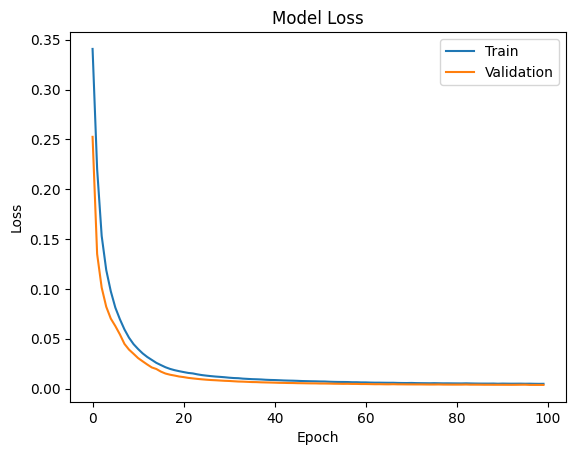

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()